In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-test-scores-of-students/test_scores.csv


In [2]:
df = pd.read_csv('/kaggle/input/predict-test-scores-of-students/test_scores.csv')

# EDA

In [3]:
df

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...
2128,ZOWMK,Urban,Public,ZBH,Standard,30.0,T8LSK,Female,Does not qualify,39.0,55.0
2129,ZOWMK,Urban,Public,ZBH,Standard,30.0,VNP26,Female,Qualifies for reduced/free lunch,38.0,46.0
2130,ZOWMK,Urban,Public,ZBH,Standard,30.0,YDR1Z,Female,Qualifies for reduced/free lunch,45.0,51.0
2131,ZOWMK,Urban,Public,ZBH,Standard,30.0,YUEIH,Male,Qualifies for reduced/free lunch,46.0,53.0


NameError: name 'plt' is not defined

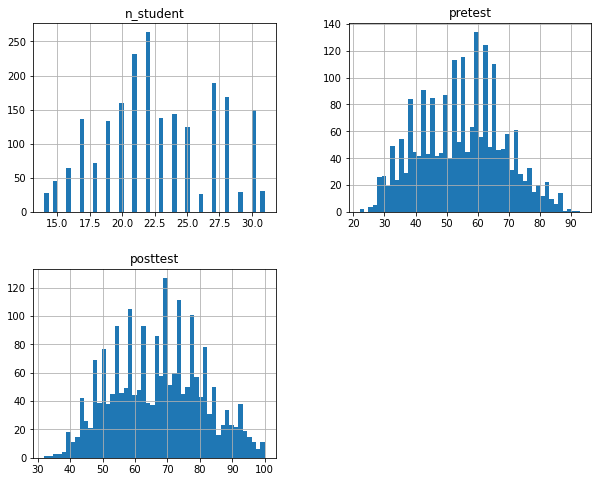

In [4]:
df.hist(bins=50,figsize=(10,8))
plt.show()

# Check data types and null values

In [ ]:
df.info()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.isnull())
plt.show()

# Statisitcs 

In [ ]:
df.describe()

# Make correlation of data

In [ ]:
corr = df.corr()
corr
sns.heatmap(corr, annot=True)

# Q1 Make data analysis to students data and give summary about it with visualization to this data

In [ ]:
df['school'].value_counts().sum()

In [ ]:
schools = df['school'].value_counts()
fig ,ax1= plt.subplots(1,1, figsize = (18,10))
ax1.set_title('Types of school')
sns.barplot(x = schools.index, y =schools);

In [ ]:
school_setting=df['school_setting'].value_counts()
teaching_method =df['teaching_method'].value_counts()
gender = df['gender'].value_counts()
school_type=df['school_type'].value_counts()

fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize = (10,10))

# Increase the space between the subplots
plt.subplots_adjust(wspace=.5)

ax1.set_title('gender')
ax1.tick_params(labelrotation = 90)
sns.barplot(x =gender.index, y =gender, ax = ax1);

ax2.set_title('teaching_method')
ax2.tick_params(labelrotation = 90)
sns.barplot(x =teaching_method.index, y =teaching_method, ax = ax2);

ax3.set_title('school_setting')
ax3.tick_params(labelrotation = 90)
sns.barplot(x =school_setting.index, y =school_setting, ax = ax3);

ax4.set_title('school_type')
ax4.tick_params(labelrotation = 90)
sns.barplot(x =school_type.index, y =school_type, ax = ax4);

# summary of students data
# 1- number( male > female ),
# 2- (standard teachning methon > experimental),  
# 3- the most culture  of students is urban,
# 4- total number of schools = 2133 and the most students at GOOBU SCHOOL
# 5- type of schools is puplic > non public

# what is the level of students before and after test

In [ ]:

# data
student_id = df['student_id']
pre_test_score = df['pretest']
post_test_score = df['posttest']

# create the plot
fig, ax = plt.subplots()
ax.scatter(student_id, pre_test_score, label='Pre-test Score')
ax.scatter(student_id, post_test_score, label='Post-test Score')

# add a legend and labels
ax.legend(loc='upper left')
ax.set_xlabel('Student ID')
ax.set_ylabel('Test Score')

plt.show()


#  degrees of students in post-test better than pre-test

# Does the social level of students affect the academic level?

In [ ]:
df.groupby('school_setting')['posttest'].sum().plot(kind='pie',title='social seeting',autopct='%0.1f%%')

# which group of males and females have highest score 

In [ ]:
df.groupby('gender')['posttest'].sum().plot(kind='pie',title='social seeting',autopct='%0.1f%%')

# which teching method is better ? 

In [ ]:
df.groupby('teaching_method')['posttest'].sum().plot(kind='pie',title='social seeting',autopct='%0.1f%%')

# which type of schools  is better ? 

In [ ]:
df.groupby('school_type')['posttest'].sum().plot(kind='pie',title='social seeting',autopct='%0.1f%%')